# Full Analysis Source Code via Jupyter Notebook

In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

## Chapter 4 Data Collection

In [2]:
df_fuel_price = pd.read_csv('Data/fuelprice.csv')
df_fuel_price.head()

,series_type,date,ron95,ron97,diesel,diesel_eastmsia
0,level,2025-05-01,2.05,3.18,2.88,2.15
1,level,2025-04-24,2.05,3.18,2.88,2.15
2,level,2025-04-17,2.05,3.18,2.88,2.15
3,level,2025-04-10,2.05,3.28,2.98,2.15
4,level,2025-04-03,2.05,3.33,3.03,2.15


In [3]:
df_electricity_price = pd.read_csv('Data/Malaysia_Electricity_Tariff_Adjustments_2014_2024.csv')
pd.set_option('display.max_colwidth', None)
df_electricity_price

,effective_date,electricity_tariff_type,tariff(sen/kWh),description
0,2014-01-01,Basic Tariff Introduction,38.53,Introduction of the base electricity tariff mechanism
1,2018-01-01,ICPT Adjustment,38.53,Mid-term ICPT adjustment during Regulatory Period 2 (RP2) | no change in tariff
2,2019-07-01,ICPT Adjustment,38.53,Periodic ICPT review | no tariff revision
3,2020-01-01,ICPT Adjustment,38.53,Minor downward adjustment under ICPT mechanism
4,2022-01-01,RP3 Base Tariff Set,39.45,Start of Regulatory Period 3 (RP3) | base tariff slightly increased
5,2022-07-01,ICPT Adjustment,39.45,ICPT-based rebate adjustment applied
6,2023-01-01,ICPT Adjustment,39.45,ICPT structure maintained from previous period
7,2023-07-01,ICPT Adjustment,39.45,Fuel cost increase under ICPT | resulting in higher charges
8,2024-01-01,RP4 Base Tariff Begins,45.62,Start of Regulatory Period 4 (RP4) | base tariff increased by 14.2%
9,2024-07-01,Forecast Mid-Term RP4 Adjustment,45.62,High tariff level expected to persist during forecast period


In [4]:
df_vehicle_sales_2025 = pd.read_csv('Data/cars_2025.csv')
df_vehicle_sales_2025.head()

,date_reg,type,maker,model,colour,fuel,state
0,2025-01-01,motokar,BYD,Seal,white,electric,Rakan Niaga
1,2025-01-01,window_van,Cam,Placer-X,yellow,greendiesel,Johor
2,2025-01-01,jip,Chery,Jaecoo J7,green,petrol,Rakan Niaga
3,2025-01-01,jip,Chery,Jaecoo J7,silver,petrol,Rakan Niaga
4,2025-01-01,jip,Chery,Tiggo,grey,petrol,Rakan Niaga


In [5]:
df_vehicle_sales_2024 = pd.read_csv('Data/cars_2024.csv')
df_vehicle_sales_2024.head()

,date_reg,type,maker,model,colour,fuel,state
0,2024-01-01,jip,Chery,Omoda 5,black,petrol,Rakan Niaga
1,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
2,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
3,2024-01-01,pick_up,Ford,Ranger,black,petrol,Johor
4,2024-01-01,pick_up,Ford,Ranger,orange,greendiesel,Johor


In [6]:
df_policy = pd.read_csv('Data/EV_Policy_Timeline_Malaysia_2017_2024.csv')
df_policy

,year,policy/measure,summary,source link
0,2020,National Automotive Policy (NAP 2020),"Promotes Energy Efficient Vehicles (EEVs), including Electric Vehicles (EVs), through tax incentives and support for local manufacturing and R&D.",https://www.mida.gov.my/mida-news/competition-for-evs-in-southeast-asia-heats-up/
1,2021,Low Carbon Mobility Blueprint (LCMB 2021-2030),"Targets: 15% of new car sales to be xEVs by 2030; build 10,000 charging stations by 2025.",https://www.mida.gov.my/powering-the-future-accelerating-malaysias-ev-charging-revolution-for-sustainable-mobility/
2,2022,EV Import and Road Tax Exemption Policy,Fully imported (CBU) EVs exempted from import and excise duties until 2025; EVs also exempted from road tax until 2025.,https://www.malaymail.com/news/malaysia/2024/07/09/going-ev-what-the-malaysian-government-is-doing-to-charge-up-the-transition/141965
3,2023,Tesla Entry Approval,"Tesla received approval from MITI to establish operations in Malaysia, signaling a liberalization of the EV market.",https://en.wikipedia.org/wiki/Plug-in_electric_vehicles_in_Malaysia
4,2023,National Energy Transition Roadmap (NETR),Sets a target for 80% of new car sales to be xEVs by 2050; focuses on boosting local EV manufacturing and charging infrastructure.,https://autobuzz.my/2023/08/29/malaysia-govt-unveils-new-national-energy-transition-roadmap-targets-80-tiv-for-xevs-by-2050/
5,2024,Budget 2024: EV Incentives,"Includes tax relief for EV charging equipment, tax deductions for EV leasing expenses, and subsidies for electric motorcycle purchases.",https://www.malaymail.com/news/malaysia/2023/10/13/budget-2024-unity-government-focuses-on-ev-development-industry-and-public-adoption/96072
6,2025,One-off EV Purchase Subsidy,"The Malaysian Ministry of Investment, Trade and Industry (MITI) proposed a one-off subsidy to encourage EV adoption, complementing existing tax exemptions (import duty, excise duty, and road tax). The plan also includes expanding the public charging infrastructure to 10,000 stations by 2025, addressing range anxiety.",https://theedgemalaysia.com/node/709311


## Chapter 5 Data Preprocessing and Cleaning

Configuring directory parameters

In [7]:
input_files = glob.glob('Data/cars_*.csv')
output_file = 'Data/data_combined_quarterly_fuel_stats.csv'

Define fuel type mapping

In [8]:
fuel_mapping = {
    'petrol': 'petrol',
    'petrol_ng': 'petrol',
    'greendiesel': 'greendiesel',
    'hybrid_petrol': 'hybrid_petrol',
    'diesel': 'greendiesel',
    'electric': 'electric'
}

Store data for all years

In [9]:
df_vehicle_sales = []

Process each file

In [10]:
for file in input_files:
    # Extract the year from the file name
    year = file.split('_')[1].split('.')[0]
    
    # Read data
    df = pd.read_csv(file)
    
    # Handling date and fuel type
    df['date_reg'] = pd.to_datetime(df['date_reg'])
    df['quarter'] = df['date_reg'].dt.quarter
    df['fuel'] = df['fuel'].map(fuel_mapping).fillna('other')
    
    # Statistics by quarter and fuel type
    quarterly_stats = df.groupby(['quarter', 'fuel']).size().unstack(fill_value=0)
    
    # Keep only the fuel types we care about
    fuel_types = ['petrol', 'greendiesel', 'hybrid_petrol', 'electric']
    quarterly_stats = quarterly_stats.reindex(columns=fuel_types, fill_value=0)
    
    # Add year information
    quarterly_stats['year'] = year
    df_vehicle_sales.append(quarterly_stats)

Combine data from all years

In [11]:
df_combined = pd.concat(df_vehicle_sales)

Reset index and rename quarters

In [12]:
df_combined = df_combined.reset_index()
df_combined['quarter'] = 'Q' + df_combined['quarter'].astype(str)

Rearrange the order of columns

In [13]:
column_order = ['year', 'quarter'] + fuel_types
df_combined = df_combined[column_order]

Save the results as csv file

In [14]:
df_combined.to_csv(output_file, index=False)

Preview the statistical data

In [15]:
df_combined

fuel,year,quarter,petrol,greendiesel,hybrid_petrol,electric
0,2017,Q1,130462,11323,1845,9
1,2017,Q2,132040,11615,1621,13
2,2017,Q3,127712,11177,2175,2
3,2017,Q4,132674,13448,3502,1
4,2018,Q1,124378,11774,2519,4
5,2018,Q2,143169,12124,2594,2
6,2018,Q3,152348,17695,2336,2
7,2018,Q4,128473,11257,294,2
8,2019,Q1,132618,10661,1164,5
9,2019,Q2,143735,10535,1537,0


In [16]:
df_combined.head(8)

fuel,year,quarter,petrol,greendiesel,hybrid_petrol,electric
0,2017,Q1,130462,11323,1845,9
1,2017,Q2,132040,11615,1621,13
2,2017,Q3,127712,11177,2175,2
3,2017,Q4,132674,13448,3502,1
4,2018,Q1,124378,11774,2519,4
5,2018,Q2,143169,12124,2594,2
6,2018,Q3,152348,17695,2336,2
7,2018,Q4,128473,11257,294,2


In [17]:
# Filter rows where the first column 'series_type' is 'level'
df_fuel_price_level = df_fuel_price.copy()
df_fuel_price_level = df_fuel_price_level[df_fuel_price_level['series_type'] == 'level']

# Convert the 'date' column to datetime format
df_fuel_price_level['date'] = pd.to_datetime(df_fuel_price_level['date'])

# Extract year and quarter number into separate columns
df_fuel_price_level['year'] = df_fuel_price_level['date'].dt.year
df_fuel_price_level['quarter'] = 'Q' + df_fuel_price_level['date'].dt.quarter.astype(str)

# Keep only the price columns to calculate averages
price_columns = ['ron95', 'ron97', 'diesel', 'diesel_eastmsia']

# Group by year and quarter, then calculate mean for each fuel type
df_average = df_fuel_price_level.groupby(['year', 'quarter'])[price_columns].mean().round(2).reset_index()

# Save the result to a CSV file
df_average.to_csv('Data/data_quarterly_average_fuel_prices.csv', index=False)

# Preview the result (only 'level' rows)
df_average.head(8)

,year,quarter,ron95,ron97,diesel,diesel_eastmsia
0,2017,Q1,2.13,2.41,2.11,2.11
1,2017,Q2,2.09,2.36,2.02,2.02
2,2017,Q3,2.10,2.37,2.03,2.03
3,2017,Q4,2.26,2.54,2.19,2.19
4,2018,Q1,2.24,2.51,2.24,2.24
5,2018,Q2,2.20,2.52,2.18,2.18
6,2018,Q3,2.20,2.61,2.18,2.18
7,2018,Q4,2.20,2.70,2.18,2.18


## Chapter 6 Exploratory Data Analysis (EDA)

In [18]:
df_combined['time'] = df_combined['year'].astype(str) + ' ' + df_combined['quarter']
df_combined.insert(0, 'time', df_combined.pop('time'))

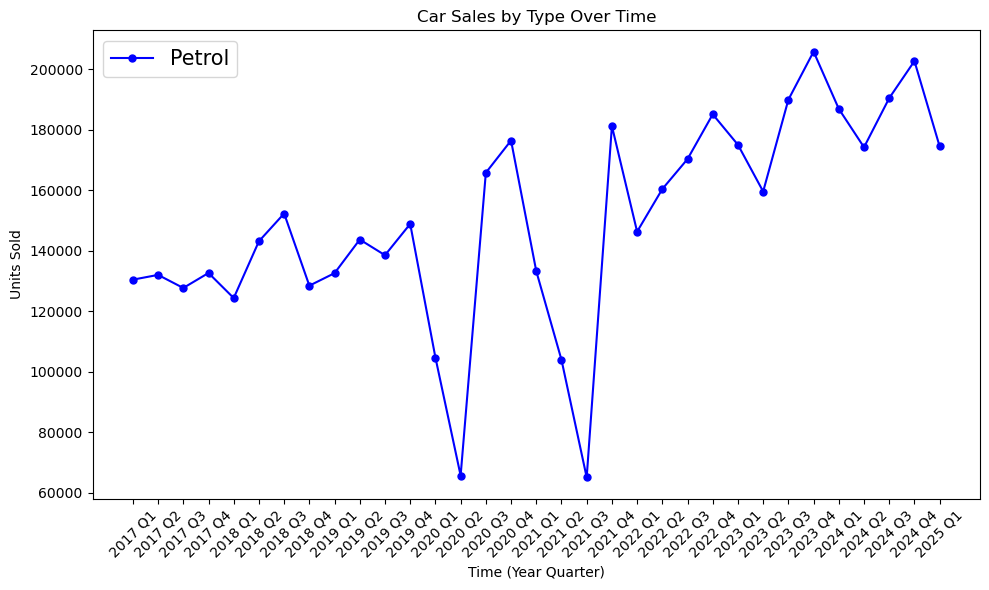

In [19]:
# Data Visualization for Petrol
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['petrol'], label='Petrol', color='blue', marker='o', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

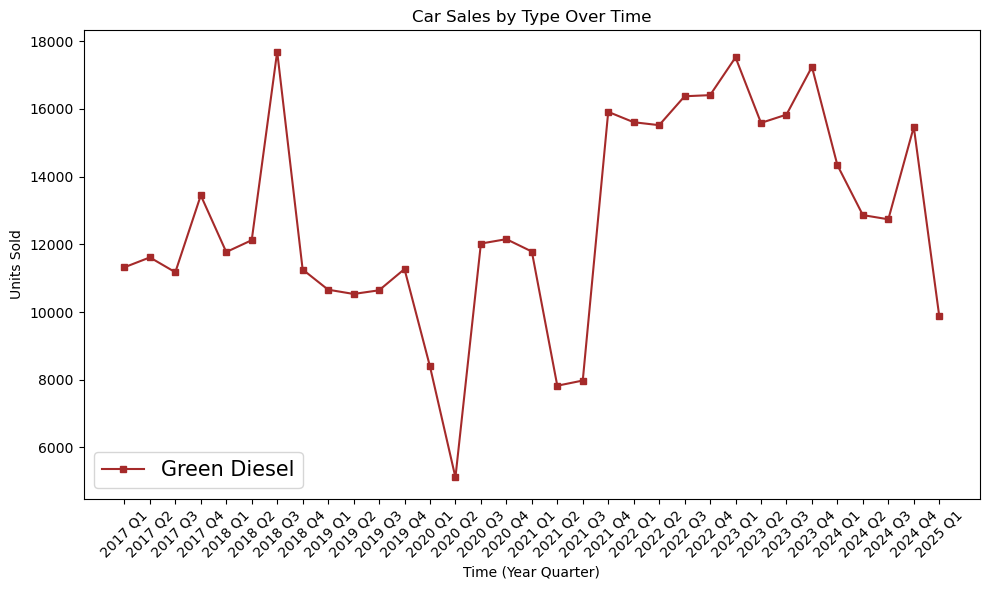

In [20]:
# Data Visualization for Green Diesel
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['greendiesel'], label='Green Diesel', color='brown', marker='s', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

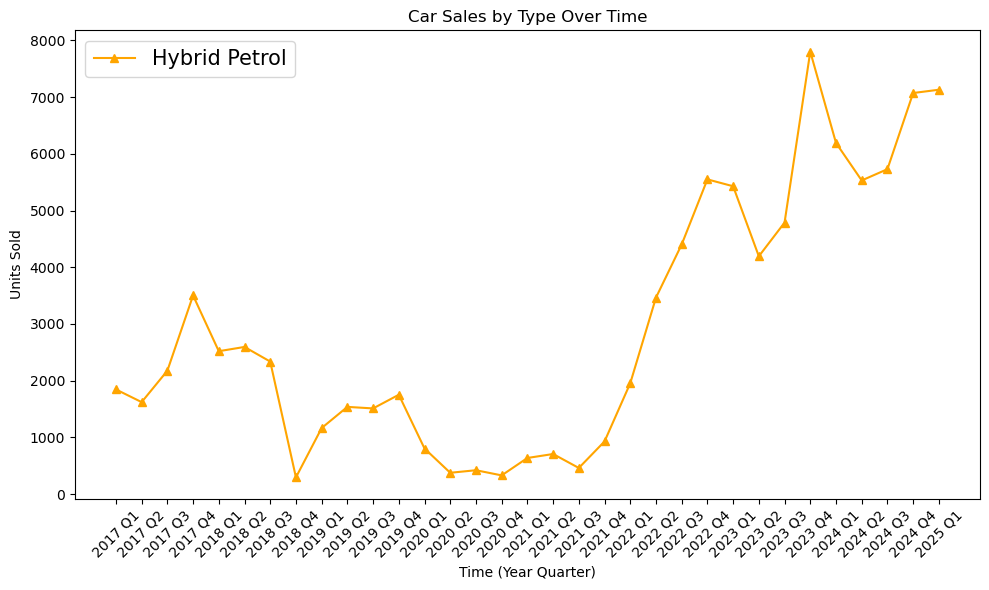

In [21]:
# Data Visualization for Hybrid Petrol
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['hybrid_petrol'], label='Hybrid Petrol', color='orange', marker='^', markersize=6)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

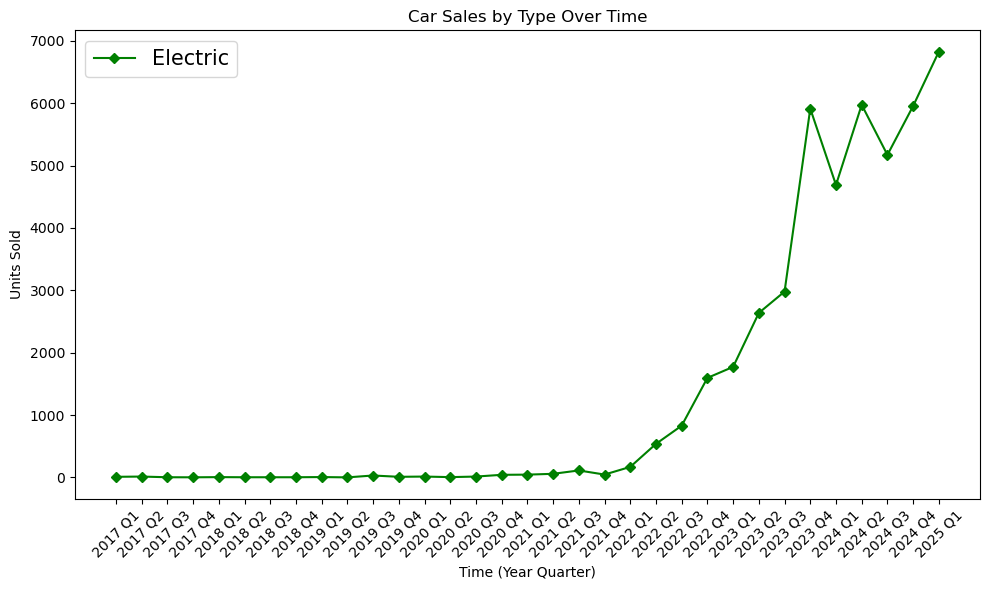

In [22]:
# Data Visualization for Electric
plt.figure(figsize=(10, 6))
plt.plot(df_combined['time'], df_combined['electric'], label='Electric', color='green', marker='D', markersize=5)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

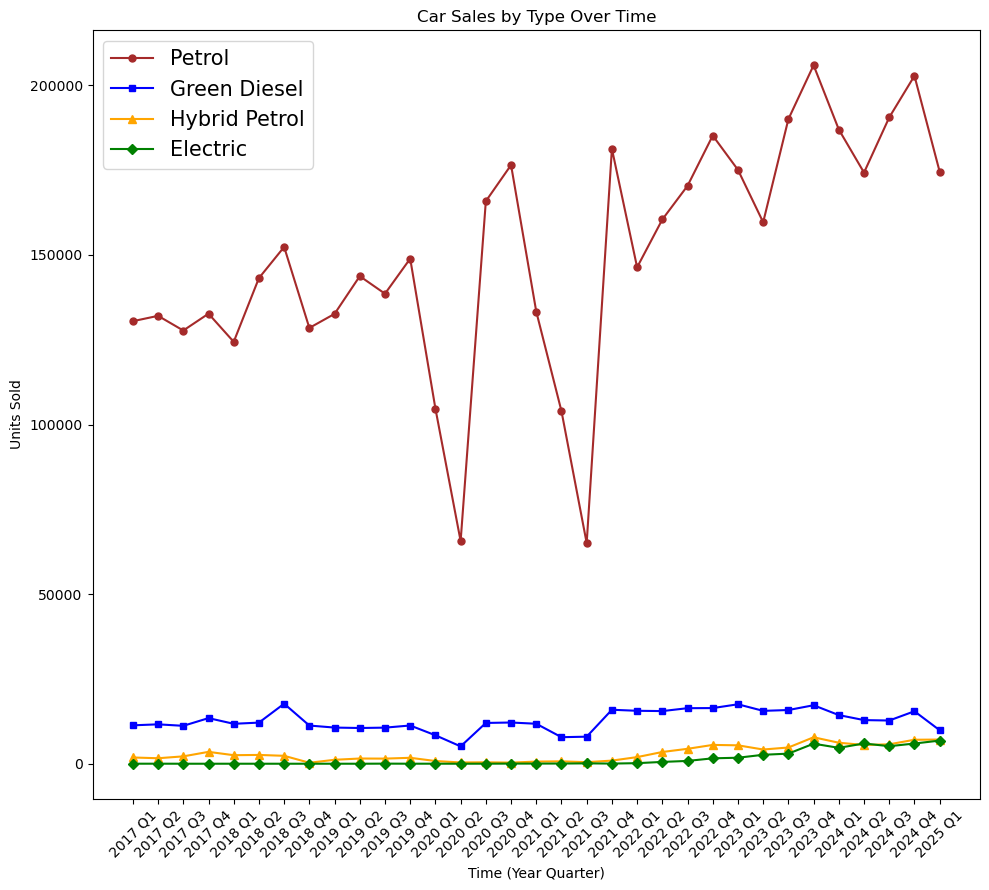

In [ ]:
# Data Visualization for vehicles of various energy types
plt.figure(figsize=(10, 9))

plt.plot(df_combined['time'], df_combined['petrol'], label='Petrol', 
        marker='o', markersize=5, color='brown')
plt.plot(df_combined['time'], df_combined['greendiesel'], label='Green Diesel',
        marker='s', markersize=5, color='blue')
plt.plot(df_combined['time'], df_combined['hybrid_petrol'], label='Hybrid Petrol',
        marker='^', markersize=6, color='orange')
plt.plot(df_combined['time'], df_combined['electric'], label='Electric', 
        marker='D', markersize=5, color='green')

plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Units Sold')
plt.xlabel('Time (Year Quarter)')
plt.title('Car Sales by Type Over Time')
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

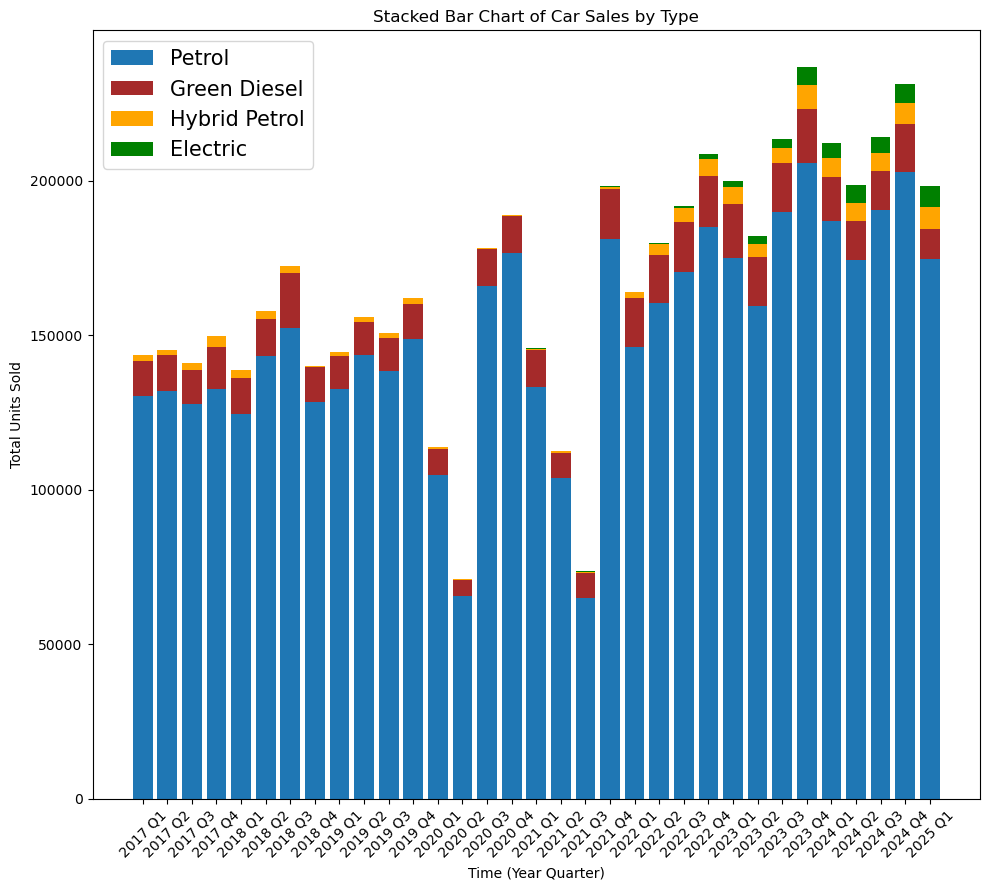

In [24]:
plt.figure(figsize=(10, 9))

plt.bar(df_combined['time'], df_combined['petrol'], 
        label='Petrol')
plt.bar(df_combined['time'], df_combined['greendiesel'], 
        bottom=df_combined['petrol'], 
        label='Green Diesel', color='brown')
plt.bar(df_combined['time'], df_combined['hybrid_petrol'], 
        bottom=df_combined['petrol'] + df_combined['greendiesel'], 
        label='Hybrid Petrol', color='orange')
plt.bar(df_combined['time'], df_combined['electric'], 
        bottom=df_combined['petrol'] + df_combined['greendiesel'] + df_combined['hybrid_petrol'], 
        label='Electric', color='green')

plt.xticks(rotation=45, fontsize=10)
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Total Units Sold')
plt.title('Stacked Bar Chart of Car Sales by Type')
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

In [25]:
df_average['time'] = df_average['year'].astype(str) + ' ' + df_average['quarter']
df_average.insert(0, 'time', df_average.pop('time'))

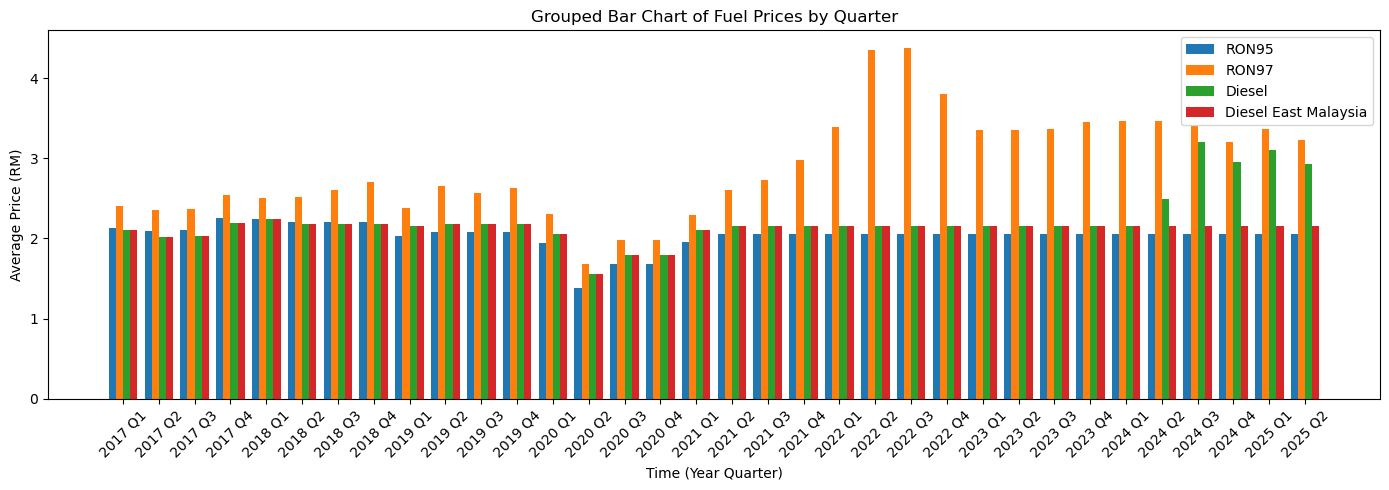

In [26]:
x = np.arange(len(df_average['time']))
width = 0.2

plt.figure(figsize=(14, 5))
plt.bar(x - 1.5 * width, df_average['ron95'], width, label='RON95')
plt.bar(x - 0.5 * width, df_average['ron97'], width, label='RON97')
plt.bar(x + 0.5 * width, df_average['diesel'], width, label='Diesel')
plt.bar(x + 1.5 * width, df_average['diesel_eastmsia'], width, label='Diesel East Malaysia')

plt.xticks(x, df_average['time'], rotation=45)
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Average Price (RM)')
plt.title('Grouped Bar Chart of Fuel Prices by Quarter')
plt.legend()
plt.tight_layout()
plt.show()

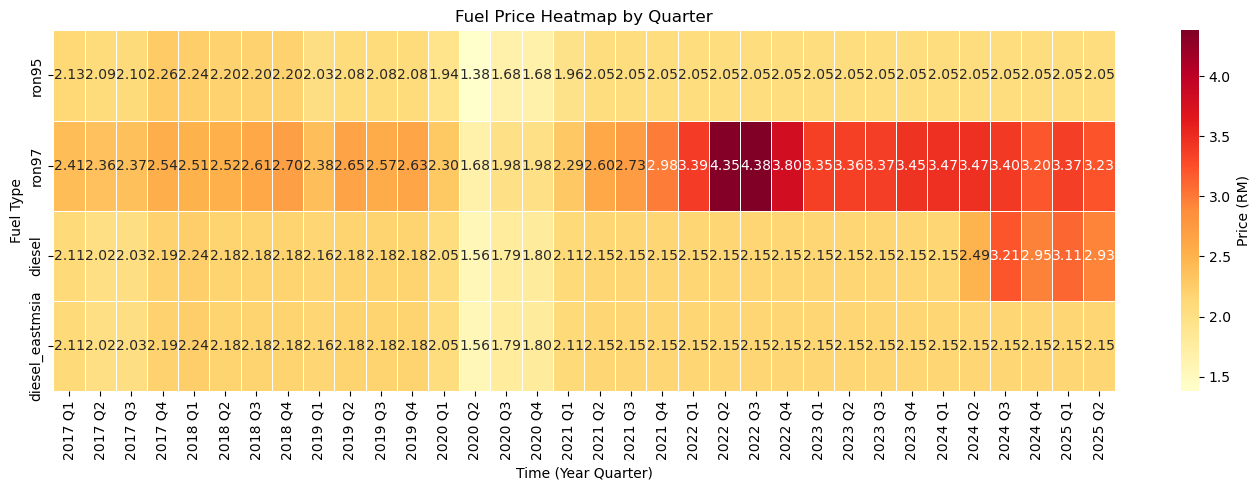

In [27]:
heatmap_data = df_average.set_index('time')[['ron95', 'ron97', 'diesel', 'diesel_eastmsia']].T

plt.figure(figsize=(14, 5))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Price (RM)'}
)

plt.title('Fuel Price Heatmap by Quarter')
plt.xlabel('Time (Year Quarter)')
plt.ylabel('Fuel Type')
plt.tight_layout()
plt.show()

In [28]:
df_combined.head(8)

fuel,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric
0,2017 Q1,2017,Q1,130462,11323,1845,9
1,2017 Q2,2017,Q2,132040,11615,1621,13
2,2017 Q3,2017,Q3,127712,11177,2175,2
3,2017 Q4,2017,Q4,132674,13448,3502,1
4,2018 Q1,2018,Q1,124378,11774,2519,4
5,2018 Q2,2018,Q2,143169,12124,2594,2
6,2018 Q3,2018,Q3,152348,17695,2336,2
7,2018 Q4,2018,Q4,128473,11257,294,2


In [29]:
df_average.head(8)

,time,year,quarter,ron95,ron97,diesel,diesel_eastmsia
0,2017 Q1,2017,Q1,2.13,2.41,2.11,2.11
1,2017 Q2,2017,Q2,2.09,2.36,2.02,2.02
2,2017 Q3,2017,Q3,2.10,2.37,2.03,2.03
3,2017 Q4,2017,Q4,2.26,2.54,2.19,2.19
4,2018 Q1,2018,Q1,2.24,2.51,2.24,2.24
5,2018 Q2,2018,Q2,2.20,2.52,2.18,2.18
6,2018 Q3,2018,Q3,2.20,2.61,2.18,2.18
7,2018 Q4,2018,Q4,2.20,2.70,2.18,2.18


In [30]:
df_cross = pd.merge(df_combined, df_average, on='time')
df_cross.head(8)

,time,year_x,quarter_x,petrol,greendiesel,hybrid_petrol,electric,year_y,quarter_y,ron95,ron97,diesel,diesel_eastmsia
0,2017 Q1,2017,Q1,130462,11323,1845,9,2017,Q1,2.13,2.41,2.11,2.11
1,2017 Q2,2017,Q2,132040,11615,1621,13,2017,Q2,2.09,2.36,2.02,2.02
2,2017 Q3,2017,Q3,127712,11177,2175,2,2017,Q3,2.10,2.37,2.03,2.03
3,2017 Q4,2017,Q4,132674,13448,3502,1,2017,Q4,2.26,2.54,2.19,2.19
4,2018 Q1,2018,Q1,124378,11774,2519,4,2018,Q1,2.24,2.51,2.24,2.24
5,2018 Q2,2018,Q2,143169,12124,2594,2,2018,Q2,2.20,2.52,2.18,2.18
6,2018 Q3,2018,Q3,152348,17695,2336,2,2018,Q3,2.20,2.61,2.18,2.18
7,2018 Q4,2018,Q4,128473,11257,294,2,2018,Q4,2.20,2.70,2.18,2.18


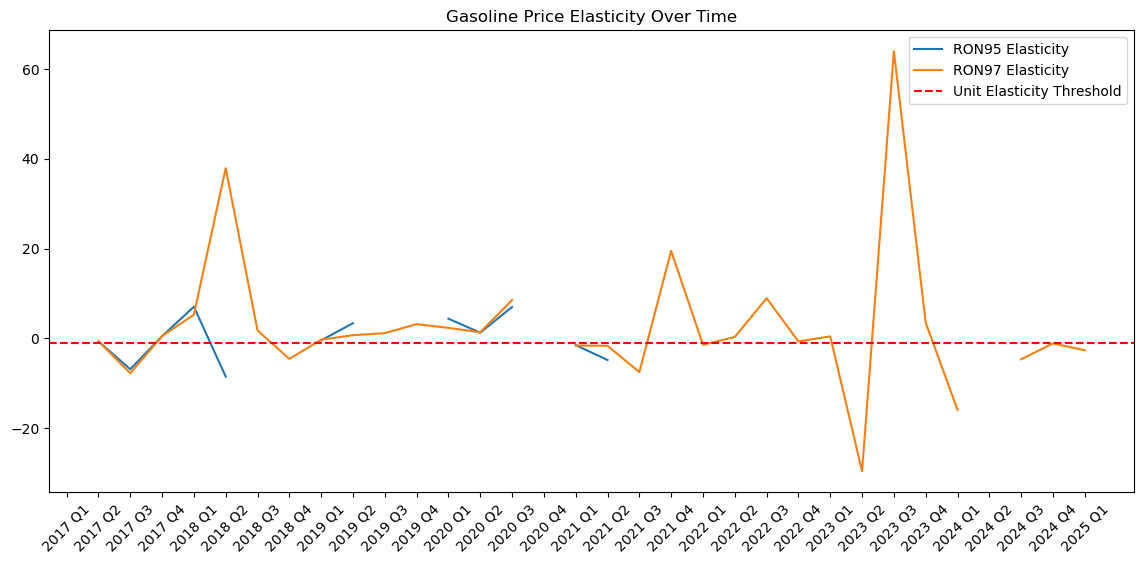

In [31]:
df_cross['ron95_elasticity'] = df_cross['petrol'].pct_change() / df_cross['ron95'].pct_change()
df_cross['ron97_elasticity'] = df_cross['petrol'].pct_change() / df_cross['ron97'].pct_change()

plt.figure(figsize=(14,6))
plt.plot(df_cross['time'], df_cross['ron95_elasticity'], label='RON95 Elasticity')
plt.plot(df_cross['time'], df_cross['ron97_elasticity'], label='RON97 Elasticity')
plt.axhline(y=-1, color='r', linestyle='--', label='Unit Elasticity Threshold')
plt.xticks(rotation=45)
plt.title('Gasoline Price Elasticity Over Time')
plt.legend()
plt.show()

In [ ]:
df_cross['petrol_diesel_ratio'] = df_cross['ron95'] / df_cross['diesel']
df_cross['ev_share'] = df_cross['electric'] / df_cross[['petrol', 'greendiesel', 'hybrid_petrol', 'electric']].sum(axis=1) * 100

model = ols('ev_share ~ petrol_diesel_ratio + ron95 + diesel', data=df_cross).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ev_share   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     15.87
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           2.70e-06
Time:                        21:10:25   Log-Likelihood:                -32.118
No. Observations:                  33   AIC:                             72.24
Df Residuals:                      29   BIC:                             78.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.9924    

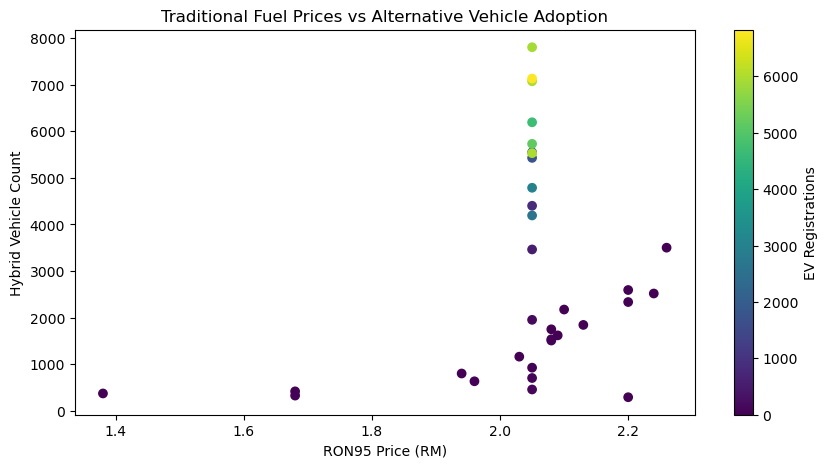

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(df_cross['ron95'], df_cross['hybrid_petrol'], c=df_cross['electric'], cmap='viridis')
plt.colorbar(label='EV Registrations')
plt.xlabel('RON95 Price (RM)')
plt.ylabel('Hybrid Vehicle Count')
plt.title('Traditional Fuel Prices vs Alternative Vehicle Adoption')
plt.show()

In [34]:
pre_ev = df_cross[df_cross['time'] <= '2022 Q1']
post_ev = df_cross[df_cross['time'] >= '2022 Q1']

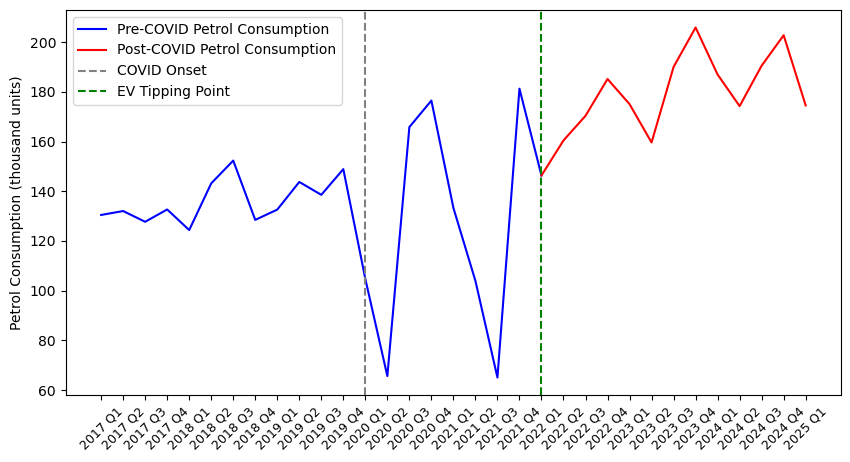

In [35]:
plt.figure(figsize=(10,5))
plt.plot(pre_ev['time'], pre_ev['petrol']/1000, 'b-', label='Pre-COVID Petrol Consumption')
plt.plot(post_ev['time'], post_ev['petrol']/1000, 'r-', label='Post-COVID Petrol Consumption')
plt.axvline(x='2020 Q1', color='gray', linestyle='--', label='COVID Onset')
plt.axvline(x='2022 Q1', color='green', linestyle='--', label='EV Tipping Point')
plt.xticks(rotation=45, fontsize=9)
plt.ylabel('Petrol Consumption (thousand units)')
plt.legend()
plt.show()

In [36]:
df_share = df_combined.copy()
df_share['year'] = df_share['year'].astype(int)

df_share['total'] = df_share[['petrol', 'greendiesel', 'hybrid_petrol', 'electric']].sum(axis=1)

df_share['petrol_share'] = df_share['petrol'] / df_share['total']
df_share['greendiesel_share'] = df_share['greendiesel'] / df_share['total']
df_share['hybrid_petrol_share'] = df_share['hybrid_petrol'] / df_share['total']
df_share['electric_share'] = df_share['electric'] / df_share['total']

df_share.to_csv('Data/data_share.csv', index=False)
df_share

fuel,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric,total,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share
0,2017 Q1,2017,Q1,130462,11323,1845,9,143639,0.908263,0.078830,0.012845,0.000063
1,2017 Q2,2017,Q2,132040,11615,1621,13,145289,0.908809,0.079944,0.011157,0.000089
2,2017 Q3,2017,Q3,127712,11177,2175,2,141066,0.905335,0.079232,0.015418,0.000014
3,2017 Q4,2017,Q4,132674,13448,3502,1,149625,0.886710,0.089878,0.023405,0.000007
4,2018 Q1,2018,Q1,124378,11774,2519,4,138675,0.896903,0.084904,0.018165,0.000029
5,2018 Q2,2018,Q2,143169,12124,2594,2,157889,0.906770,0.076788,0.016429,0.000013
6,2018 Q3,2018,Q3,152348,17695,2336,2,172381,0.883786,0.102651,0.013551,0.000012
7,2018 Q4,2018,Q4,128473,11257,294,2,140026,0.917494,0.080392,0.002100,0.000014
8,2019 Q1,2019,Q1,132618,10661,1164,5,144448,0.918102,0.073805,0.008058,0.000035
9,2019 Q2,2019,Q2,143735,10535,1537,0,155807,0.922520,0.067616,0.009865,0.000000


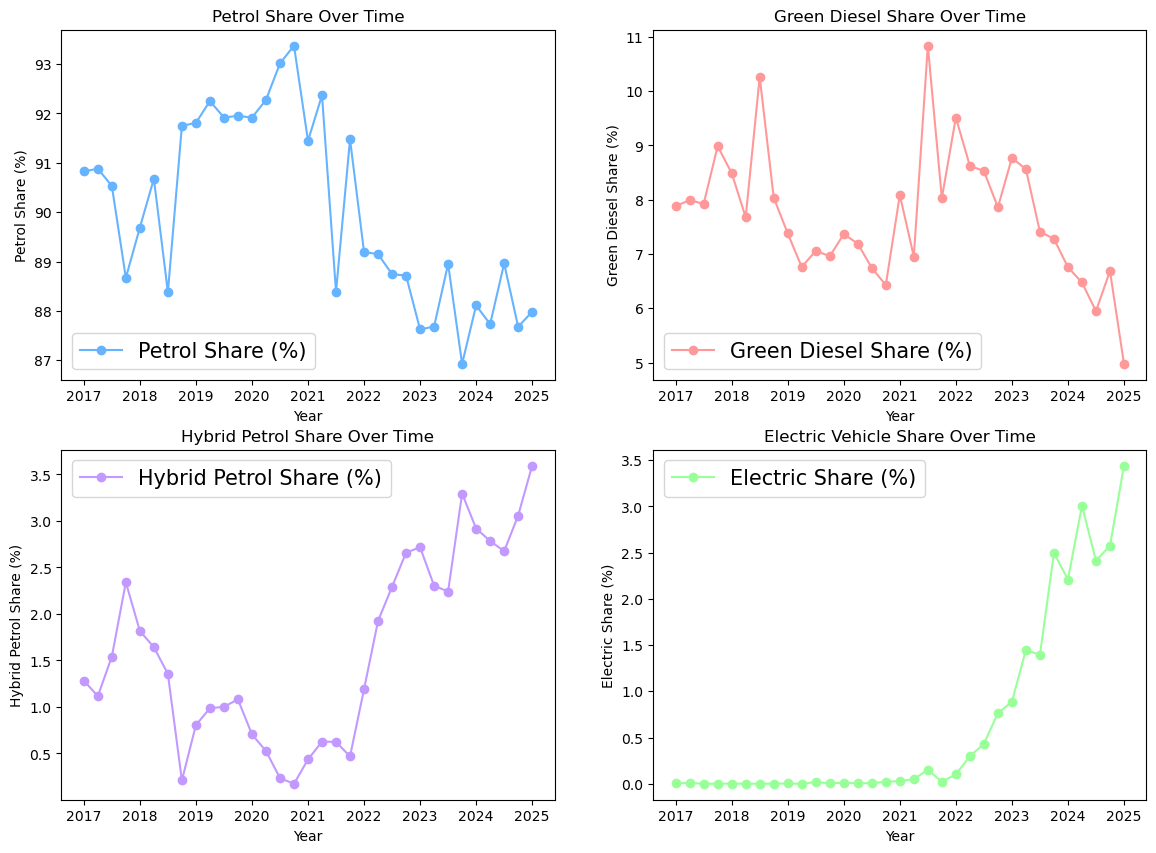

In [37]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['petrol_share']*100, 'o-', 
    label='Petrol Share (%)', color='#66b3ff')
plt.title('Petrol Share Over Time')
plt.xlabel('Year')
plt.ylabel('Petrol Share (%)')
plt.legend(loc='lower left', fontsize=15)

plt.subplot(2, 2, 2)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['greendiesel_share']*100, 'o-', 
    label='Green Diesel Share (%)', color='#ff9999')
plt.title('Green Diesel Share Over Time')
plt.xlabel('Year')
plt.ylabel('Green Diesel Share (%)')
plt.legend(loc='lower left', fontsize=15)

plt.subplot(2, 2, 3)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['hybrid_petrol_share']*100, 'o-', 
    label='Hybrid Petrol Share (%)', color='#c299ff')
plt.title('Hybrid Petrol Share Over Time')
plt.xlabel('Year')
plt.ylabel('Hybrid Petrol Share (%)')
plt.legend(loc='upper left', fontsize=15)

plt.subplot(2, 2, 4)
plt.plot(
    df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4, 
    df_share['electric_share']*100, 'o-', 
    label='Electric Share (%)', color='#99ff99')
plt.title('Electric Vehicle Share Over Time')
plt.xlabel('Year')
plt.ylabel('Electric Share (%)')
plt.legend(loc='upper left', fontsize=15)

plt.show()

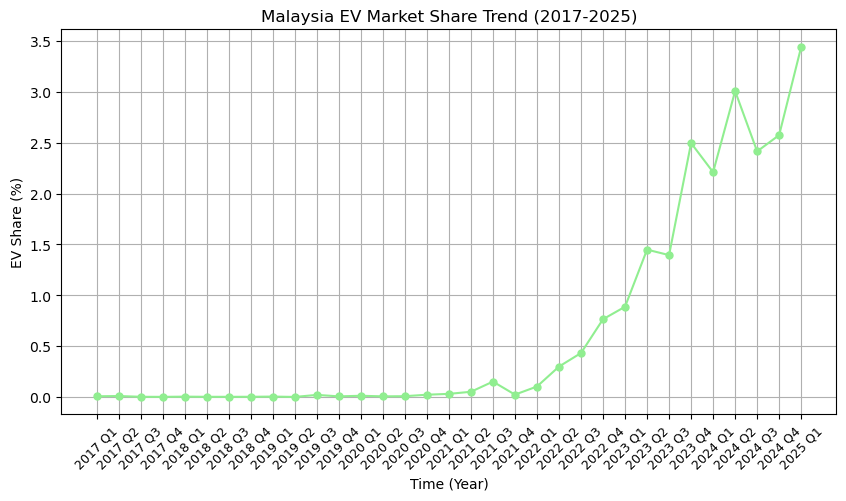

In [38]:
plt.figure(figsize=(10,5))
plt.plot(df_share['time'], df_share['electric_share']*100, 'o-', color='lightgreen', markersize=5, label='EV Share (%)')
plt.title('Malaysia EV Market Share Trend (2017-2025)')
plt.xticks(rotation=45, fontsize=9)
plt.xlabel('Time (Year)')
plt.ylabel('EV Share (%)')
plt.grid(True)
plt.show()

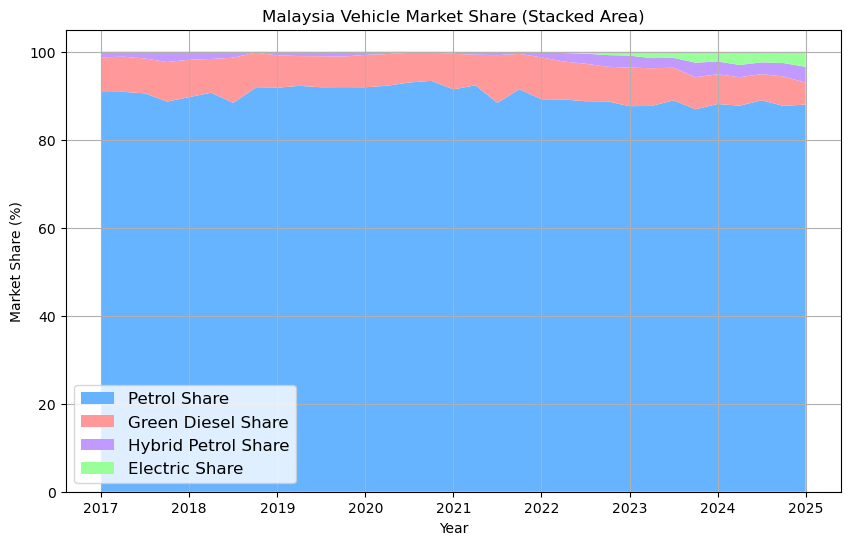

In [39]:
plt.figure(figsize=(10,6))

share_df = pd.DataFrame({
    'time': df_share['year'] + (df_share['quarter'].str[1].astype(int)-1)/4,
    'Petrol Share': df_share['petrol_share'],
    'Green Diesel Share': df_share['greendiesel_share'],
    'Hybrid Petrol Share': df_share['hybrid_petrol_share'],
    'Electric Share': df_share['electric_share']
})

plt.stackplot(
    share_df['time'],
    [share_df[col]*100 for col in ['Petrol Share', 'Green Diesel Share', 'Hybrid Petrol Share', 'Electric Share']],
    labels=share_df.columns[1:],
    colors=['#66b3ff', '#ff9999', '#c299ff', '#99ff99']
)

plt.title('Malaysia Vehicle Market Share (Stacked Area)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend(loc='lower left', fontsize='large')
plt.grid(True)
plt.show()

## Chapter 7 Multivariate Time Series Modeling

In [40]:
df_model = pd.merge(df_share, df_average, on=['time', 'year', 'quarter'], how='left')

df_model['year_date'] = pd.to_datetime(df_model['year'].astype(str) + '-12-31')
df_electricity_price['effective_date'] = pd.to_datetime(df_electricity_price['effective_date'])
df_model = pd.merge_asof(
    df_model, df_electricity_price[['effective_date', 'tariff(sen/kWh)']],
    left_on='year_date', right_on='effective_date', direction='backward'
)
df_model.rename(columns={'tariff(sen/kWh)': 'electric_price'}, inplace=True)
df_model.drop(columns=['year_date', 'effective_date'], inplace=True)

policy_years = set(df_policy['year'])
df_model['policy'] = df_model['year'].apply(lambda x: 1 if x in policy_years else 0)

df_model.to_csv('Data/data_merged_modeling.csv', index=False)
pd.set_option('display.expand_frame_repr', False)
print(df_model.head(8))


      time  year quarter  petrol  greendiesel  hybrid_petrol  electric   total  petrol_share  greendiesel_share  hybrid_petrol_share  electric_share  ron95  ron97  diesel  diesel_eastmsia  electric_price  policy
0  2017 Q1  2017      Q1  130462        11323           1845         9  143639      0.908263           0.078830             0.012845        0.000063   2.13   2.41    2.11             2.11           38.53       0
1  2017 Q2  2017      Q2  132040        11615           1621        13  145289      0.908809           0.079944             0.011157        0.000089   2.09   2.36    2.02             2.02           38.53       0
2  2017 Q3  2017      Q3  127712        11177           2175         2  141066      0.905335           0.079232             0.015418        0.000014   2.10   2.37    2.03             2.03           38.53       0
3  2017 Q4  2017      Q4  132674        13448           3502         1  149625      0.886710           0.089878             0.023405        0.000007   2

In [41]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VECM
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tools.eval_measures import rmse, meanabs
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

### Vector Autoregression with Exogenous Variables Model, VARX Model

In [42]:
# Load the dataset
df_model = pd.read_csv('Data/data_merged_modeling.csv')

# Conversion time to standard form
df_model['date'] = df_model['time'].apply(
    lambda x: pd.to_datetime(f"{x.split(' ')[0]}-{ {1:1, 2:4, 3:7, 4:10}[int(x.split(' ')[1][1])]}-01")
)
df_model = df_model.set_index('date').asfreq('QS')
df_model.tail()

,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric,total,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share,ron95,ron97,diesel,diesel_eastmsia,electric_price,policy
date,,,,,,,,,,,,,,,,,,
2024-01-01,2024 Q1,2024,Q1,186967,14340,6192,4689,212188,0.881138,0.067582,0.029182,0.022098,2.05,3.47,2.15,2.15,45.62,1
2024-04-01,2024 Q2,2024,Q2,174267,12865,5530,5974,198636,0.877318,0.064767,0.027840,0.030075,2.05,3.47,2.49,2.15,45.62,1
2024-07-01,2024 Q3,2024,Q3,190533,12741,5729,5171,214174,0.889618,0.059489,0.026749,0.024144,2.05,3.40,3.21,2.15,45.62,1
2024-10-01,2024 Q4,2024,Q4,202793,15470,7072,5955,231290,0.876791,0.066886,0.030576,0.025747,2.05,3.20,2.95,2.15,45.62,1
2025-01-01,2025 Q1,2025,Q1,174541,9877,7130,6827,198375,0.879854,0.049790,0.035942,0.034415,2.05,3.37,3.11,2.15,45.62,1


In [43]:
# Define endogenous and exogenous variables
endog_vars = ['petrol_share', 'greendiesel_share', 'hybrid_petrol_share', 'electric_share']
exog_vars = ['ron95','ron97', 'diesel', 'diesel_eastmsia', 'electric_price', 'policy']

# Set the proportion of data to use for training and testing
n_total = len(df_model)
n_train = int(n_total * 0.9)
n_test = n_total - n_train

# Extract training and testing datasets
df_train = df_model.iloc[:n_train]
df_test = df_model.iloc[n_train:]

# Display the lengths of the datasets
print(f"The length of the total dataset: {n_total}")
print(f"The length of the training dataset: {n_train}")
print(f"The length of the testing dataset: {n_test}")

The length of the total dataset: 33
The length of the training dataset: 29
The length of the testing dataset: 4


In [44]:
# Choose the best lag order for the VAR model by human judgment
best_lag_order = 3

# Fit the VAR model with the selected lag order
model_varx_fitted = VAR(
    df_train[endog_vars],
    exog=df_train[exog_vars]
).fit(best_lag_order)
print(model_varx_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, Jun, 2025
Time:                     21:10:27
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -72.2454
Nobs:                     26.0000    HQIC:                  -74.8639
Log likelihood:           915.428    FPE:                5.25532e-33
AIC:                     -75.9229    Det(Omega_mle):     5.70316e-34
--------------------------------------------------------------------
Results for equation petrol_share
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.067538              NAN              NAN             NAN
ron95                         -0.080632         0.103295           -0.781           0.435
ron97            

c:\Users\zeyu10\anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


In [45]:
# Set test data for forecasting
exog_forecast = df_test[exog_vars].values
n_forecast_steps = len(df_test)

# Use the fitted model to forecast values
forecast_output = model_varx_fitted.forecast(
    y=df_train[endog_vars].values,
    steps=n_forecast_steps,
    exog_future=exog_forecast
)
df_forecast = pd.DataFrame(forecast_output, index=df_test.index, columns=endog_vars)
df_forecast

,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share
date,,,,
2024-04-01,0.881613,0.044983,0.030885,0.042518
2024-07-01,0.907572,0.037371,0.021475,0.033582
2024-10-01,0.891690,0.002359,0.034313,0.071638
2025-01-01,0.900832,0.010728,0.040332,0.048108


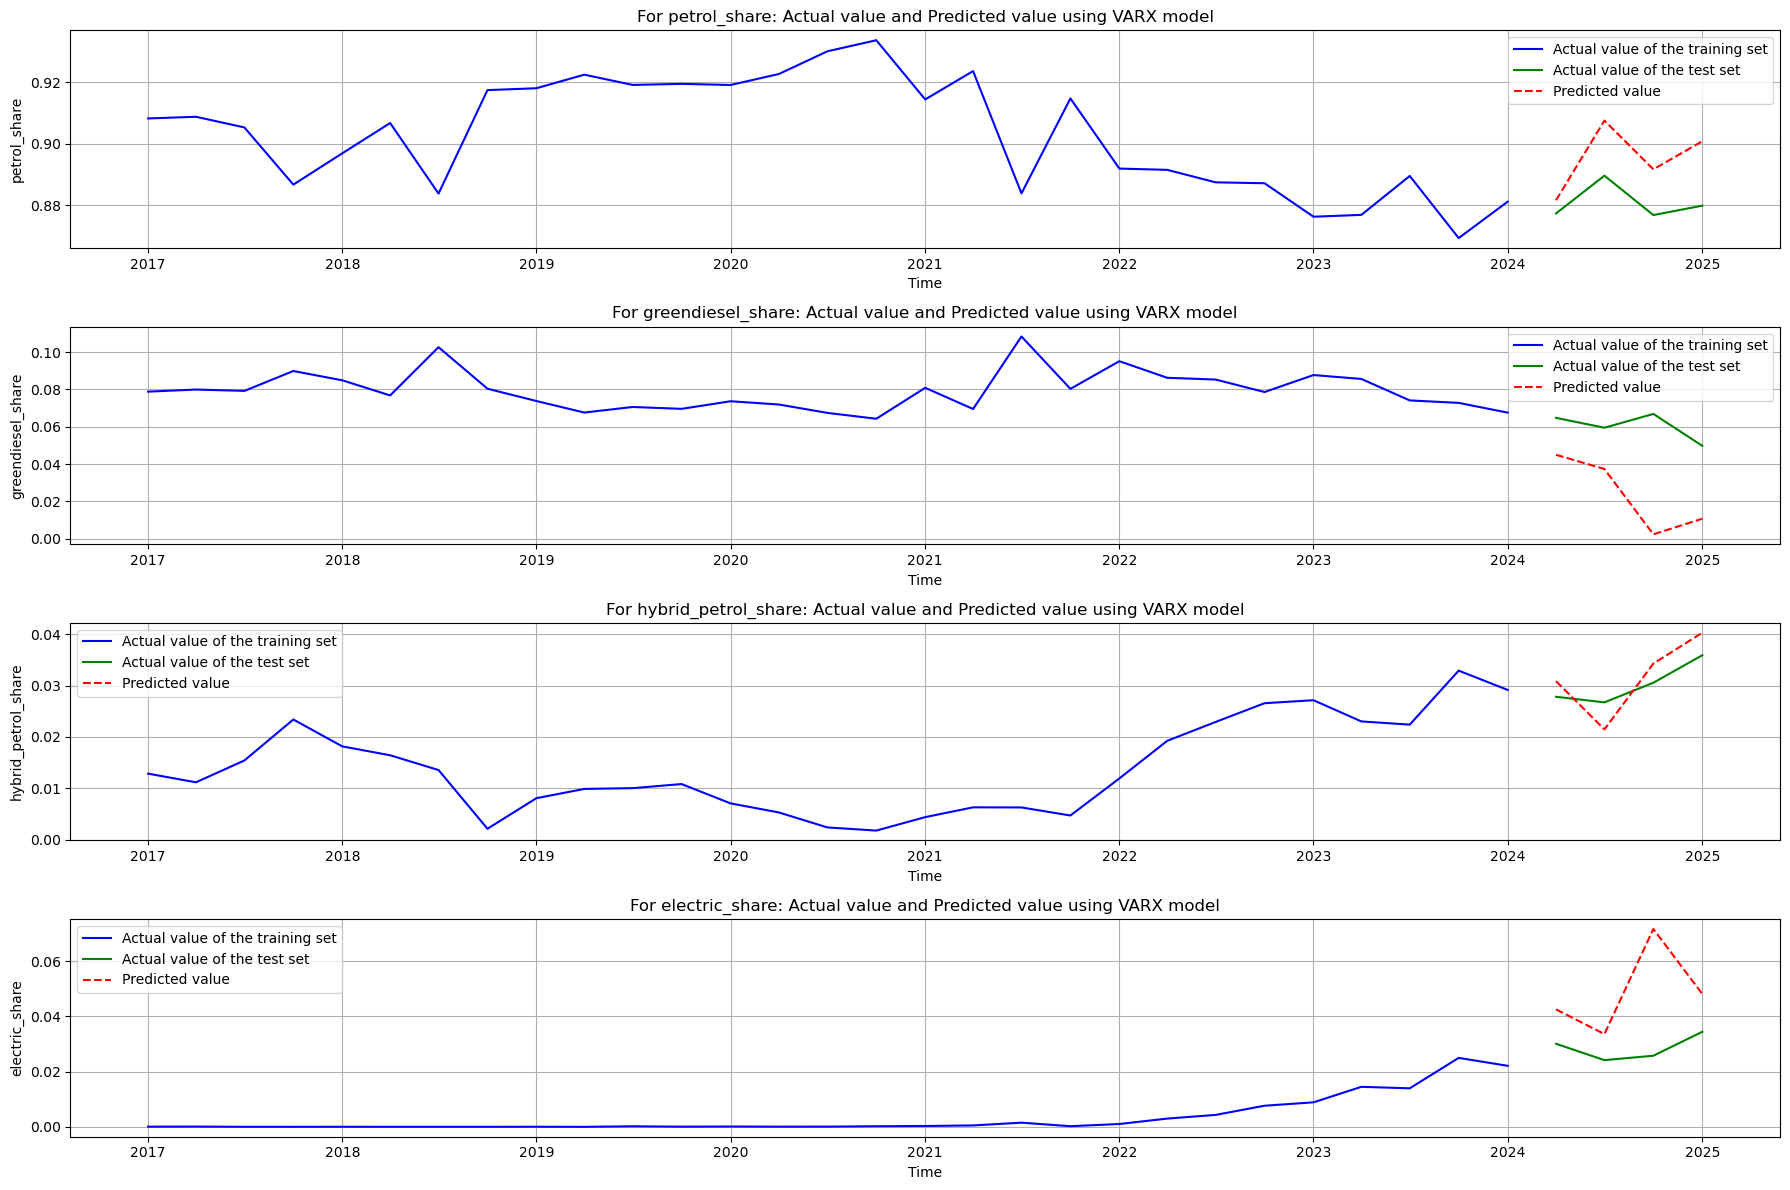

In [ ]:
# Visualize the actual values and forecasted values
plt.figure(figsize=(18, 12))
for i, var in enumerate(endog_vars):
    plt.subplot(len(endog_vars), 1, i + 1)
    plt.plot(df_train.index, df_train[var], label='Actual value of the training set', color='blue')
    plt.plot(df_test.index, df_test[var], label='Actual value of the test set', color='green')
    plt.plot(df_forecast.index, df_forecast[var], label='Predicted value', color='red', linestyle='--')
    plt.title(f'For {var}: Actual value and Predicted value using VARX model')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Save evaluation results
evaluation_results = []

# Evaluate the model using RMSE and MAE
for var in endog_vars: 
    actual = df_test[var]
    predicted = df_forecast[var]
    rmse_val = rmse(actual, predicted)
    mae_val = meanabs(actual, predicted)
    evaluation_results.append({
        'variable': var,
        'RMSE': rmse_val,
        'MAE': mae_val
    })

# Convert evaluation results to DataFrame
df_model_evaluation = pd.DataFrame(evaluation_results)
df_model_evaluation.to_csv('Data/data_model_VARX_evaluation_results.csv', index=False)
df_model_evaluation


,variable,RMSE,MAE
0,petrol_share,0.015834,0.014531
1,greendiesel_share,0.040528,0.036372
2,hybrid_petrol_share,0.004193,0.004112
3,electric_share,0.025186,0.020366


In [48]:
# Extended forecast to 2025 Q4
forecast_dates = pd.date_range(start='2025-04-01', end='2025-10-01', freq='QS')
n_extended_steps = len(forecast_dates)

# Fill future exog with last quarter's exog value (conservative estimate)
last_exog = df_model[exog_vars].iloc[-1]
future_exog = pd.DataFrame([last_exog.values] * n_extended_steps, columns=exog_vars, index=forecast_dates)

# Perform predictions using fitted VARX model
forecast_output_ext = model_varx_fitted.forecast(
    y=df_model[endog_vars].values[-best_lag_order:],
    steps=n_extended_steps,
    exog_future=future_exog.values
)

# Generate prediction DataFrame
df_forecast_ext = pd.DataFrame(forecast_output_ext, index=forecast_dates, columns=endog_vars)
df_full_forecast = pd.concat([df_forecast, df_forecast_ext])
df_full_forecast.to_csv('Data/data_model_VARX_full_forecast.csv', index=True)
df_full_forecast



,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share
2024-04-01,0.881613,0.044983,0.030885,0.042518
2024-07-01,0.907572,0.037371,0.021475,0.033582
2024-10-01,0.891690,0.002359,0.034313,0.071638
2025-01-01,0.900832,0.010728,0.040332,0.048108
2025-04-01,0.879370,0.052386,0.028063,0.040181
2025-07-01,0.901964,0.014711,0.027496,0.055828
2025-10-01,0.889539,0.009212,0.038709,0.062540


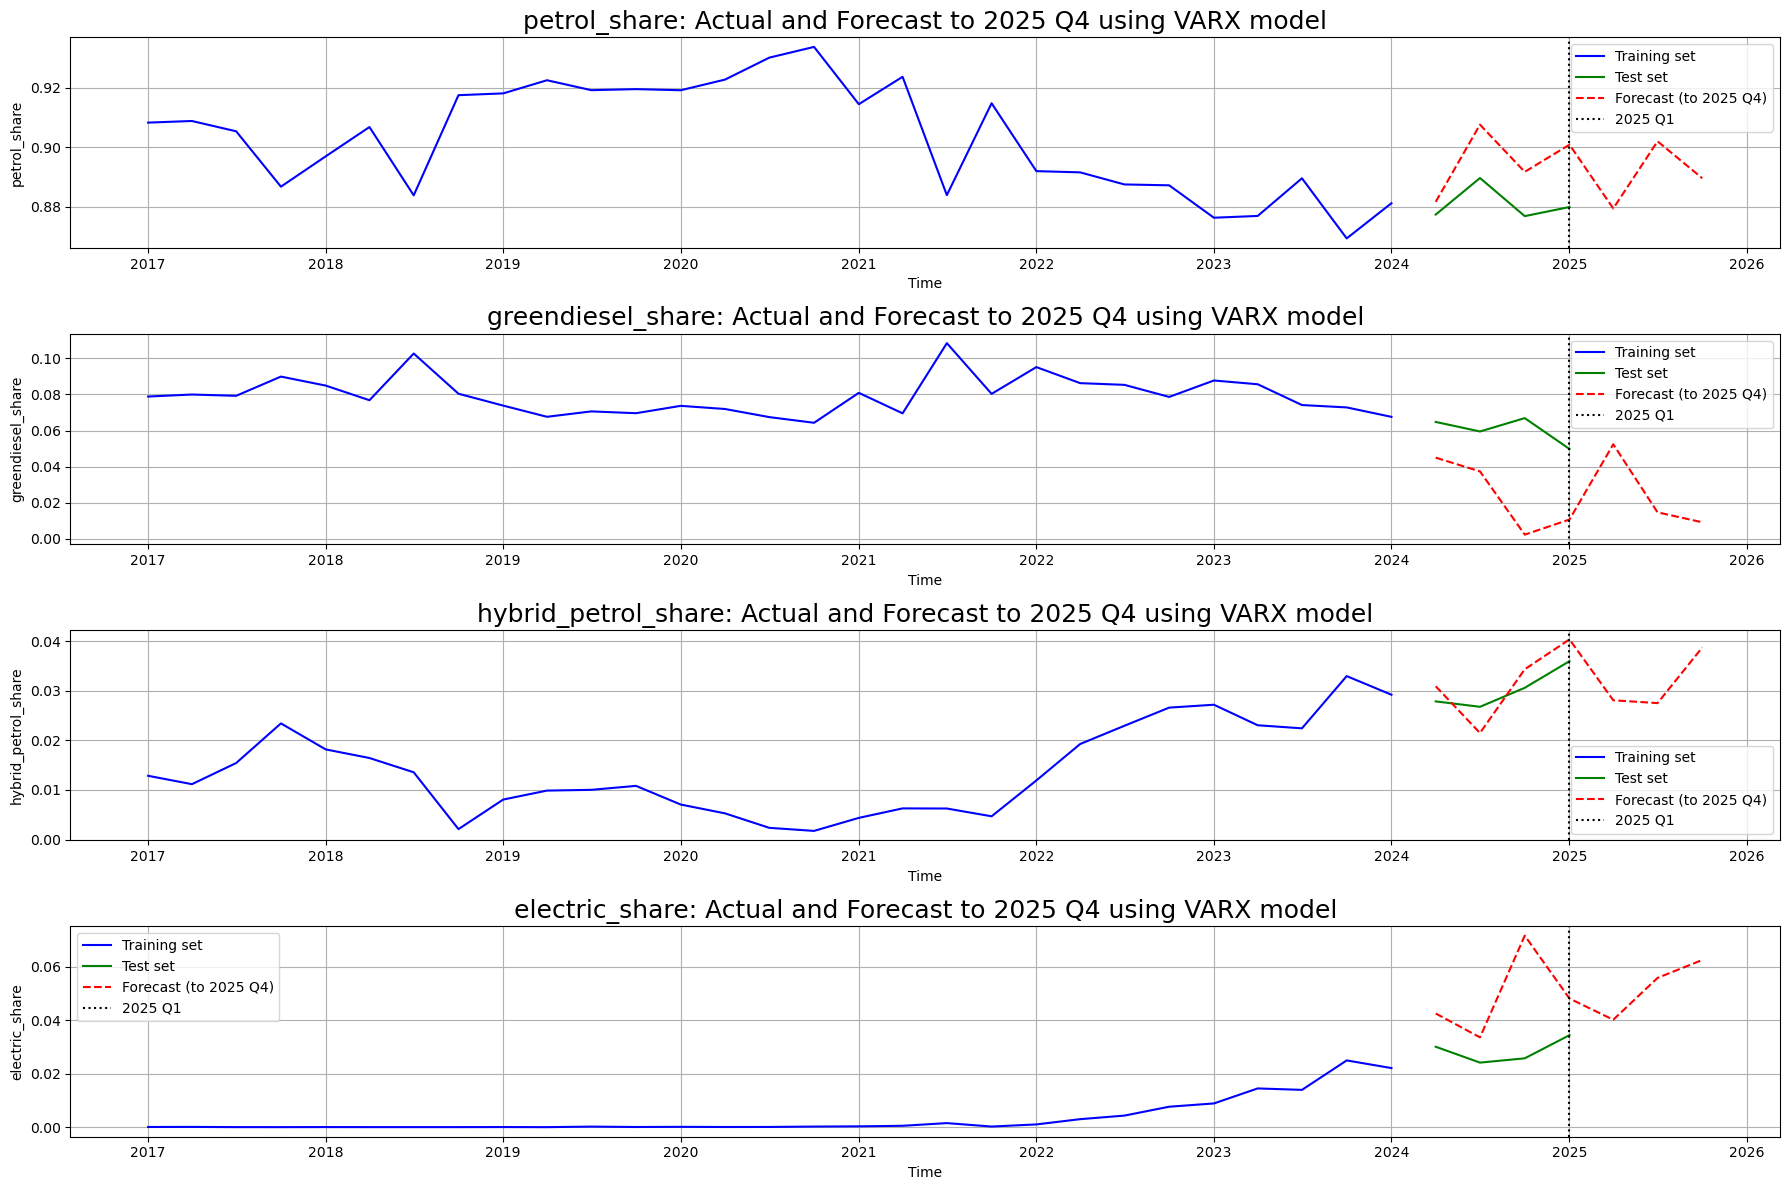

In [49]:
# Visualize the extended forecast
plt.figure(figsize=(18, 12))
for i, var in enumerate(endog_vars):
    plt.subplot(len(endog_vars), 1, i + 1)
    plt.plot(df_train.index, df_train[var], label='Training set', color='blue')
    plt.plot(df_test.index, df_test[var], label='Test set', color='green')
    plt.plot(df_full_forecast.index, df_full_forecast[var], label='Forecast (to 2025 Q4)', color='red', linestyle='--')
    plt.axvline(x=pd.to_datetime('2025-01-01'), color='black', linestyle=':', label='2025 Q1')
    plt.title(f'{var}: Actual and Forecast to 2025 Q4 using VARX model', fontsize=18)
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

### Vector Error Correction Model, VECM Model

In [50]:
# Load the dataset
df_model = pd.read_csv('Data/data_merged_modeling.csv')

# Conversion time to standard form
df_model['date'] = df_model['time'].apply(
    lambda x: pd.to_datetime(f"{x.split(' ')[0]}-{ {1:1, 2:4, 3:7, 4:10}[int(x.split(' ')[1][1])]}-01")
)
df_model = df_model.set_index('date').asfreq('QS')
df_model.tail()

,time,year,quarter,petrol,greendiesel,hybrid_petrol,electric,total,petrol_share,greendiesel_share,hybrid_petrol_share,electric_share,ron95,ron97,diesel,diesel_eastmsia,electric_price,policy
date,,,,,,,,,,,,,,,,,,
2024-01-01,2024 Q1,2024,Q1,186967,14340,6192,4689,212188,0.881138,0.067582,0.029182,0.022098,2.05,3.47,2.15,2.15,45.62,1
2024-04-01,2024 Q2,2024,Q2,174267,12865,5530,5974,198636,0.877318,0.064767,0.027840,0.030075,2.05,3.47,2.49,2.15,45.62,1
2024-07-01,2024 Q3,2024,Q3,190533,12741,5729,5171,214174,0.889618,0.059489,0.026749,0.024144,2.05,3.40,3.21,2.15,45.62,1
2024-10-01,2024 Q4,2024,Q4,202793,15470,7072,5955,231290,0.876791,0.066886,0.030576,0.025747,2.05,3.20,2.95,2.15,45.62,1
2025-01-01,2025 Q1,2025,Q1,174541,9877,7130,6827,198375,0.879854,0.049790,0.035942,0.034415,2.05,3.37,3.11,2.15,45.62,1


In [51]:
# Define endogenous and exogenous variables
endog_vars = ['petrol_share','hybrid_petrol_share',  'electric_share']
exog_vars = ['ron95', 'electric_price', 'policy']

# Set the proportion of data to use for training and testing
n_total = len(df_model)
n_train = int(n_total * 0.9)
n_test = n_total - n_train

# Extract training and testing datasets
df_train = df_model.iloc[:n_train]
df_test = df_model.iloc[n_train:]

# Display the lengths of the datasets
print(f"The length of the total dataset: {n_total}")
print(f"The length of the training dataset: {n_train}")
print(f"The length of the testing dataset: {n_test}")

The length of the total dataset: 33
The length of the training dataset: 29
The length of the testing dataset: 4


In [52]:
# Choose the cointegration rank using Johansen test
coint_rank_test = select_coint_rank(df_train[endog_vars], det_order=0, k_ar_diff=2, signif=0.05)
print(coint_rank_test.summary())
coint_rank = coint_rank_test.rank
print(f"Cointegration rank recommended based on Johansen test: {coint_rank}")


Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          30.89          29.80
  1   3          8.789          15.49
-------------------------------------
Cointegration rank recommended based on Johansen test: 1


In [53]:
# Selecting the VECM lag order
best_k_ar_diff = 1

# Fit the VECM model with the selected cointegration rank and lag order
model_vecm_fitted = VECM(
    df_train[endog_vars],
    exog=df_train[exog_vars],
    coint_rank=coint_rank,
    k_ar_diff=best_k_ar_diff,
    deterministic='ci_t'
).fit()
print(model_vecm_fitted.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation petrol_share
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
exog1                     -0.0186      0.013     -1.473      0.141      -0.043       0.006
exog2                      0.0011      0.001      1.627      0.104      -0.000       0.002
exog3                     -0.0103      0.005     -2.113      0.035      -0.020      -0.001
L1.petrol_share           -0.8947      0.136     -6.593      0.000      -1.161      -0.629
L1.hybrid_petrol_share    -1.7948      0.472     -3.799      0.000      -2.721      -0.869
L1.electric_share          1.4311      1.475      0.970      0.332      -1.460       4.322
Det. terms outside the coint. relation & lagged endog. parameters for equation hybrid_petrol_share
                             coef    std err          z      P>|z|      [0.025   

In [ ]:
# Set test data for forecasting
exog_forecast = df_test[exog_vars].values
n_forecast_steps = len(df_test)

# Use the fitted model to forecast values
forecast_output = model_vecm_fitted.predict(
    steps=n_forecast_steps,
    exog_fc=exog_forecast
)
df_forecast = pd.DataFrame(forecast_output, index=df_test.index, columns=endog_vars)
df_forecast

,petrol_share,hybrid_petrol_share,electric_share
date,,,
2024-04-01,0.872604,0.033938,0.040049
2024-07-01,0.895780,0.027691,0.033595
2024-10-01,0.875842,0.036640,0.063250
2025-01-01,0.917161,0.025161,0.049836


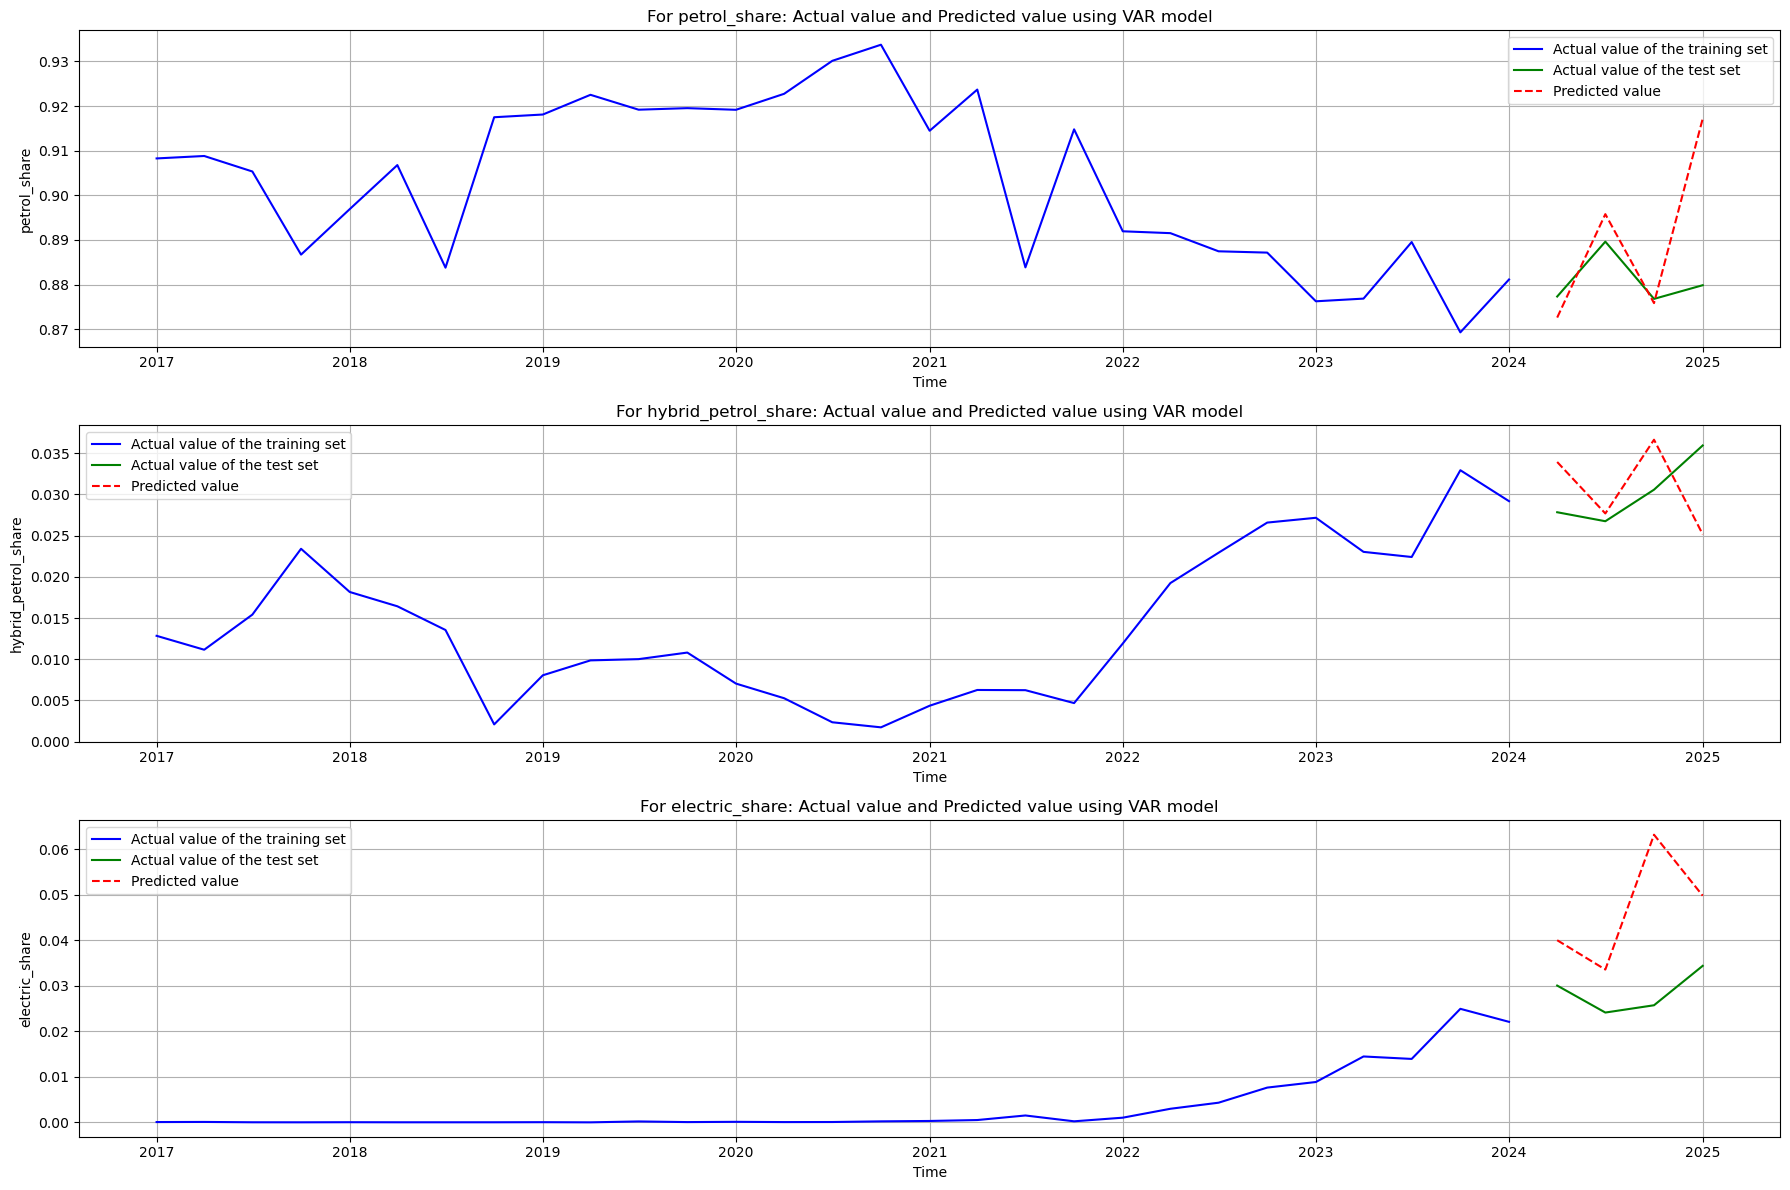

In [ ]:
# Visualize the actual values and forecasted values
plt.figure(figsize=(18, 12))
for i, var in enumerate(endog_vars):
    plt.subplot(len(endog_vars), 1, i + 1)
    plt.plot(df_train.index, df_train[var], label='Actual value of the training set', color='blue')
    plt.plot(df_test.index, df_test[var], label='Actual value of the test set', color='green')
    plt.plot(df_forecast.index, df_forecast[var], label='Predicted value', color='red', linestyle='--')
    plt.title(f'For {var}: Actual value and Predicted value using VECM model')
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Save evaluation results
evaluation_results = []

# Evaluate the model using RMSE and MAE
for var in endog_vars:
    actual = df_test[var]
    predicted = df_forecast[var]
    rmse_val = rmse(actual, predicted)
    mae_val = meanabs(actual, predicted)
    evaluation_results.append({
        'variable': var,
        'RMSE': rmse_val,
        'MAE': mae_val
    })

# Convert evaluation results to DataFrame
df_model_evaluation = pd.DataFrame(evaluation_results)
df_model_evaluation.to_csv('Data/data_model_VECM_evaluation_results.csv', index=False)
df_model_evaluation

,variable,RMSE,MAE
0,petrol_share,0.019058,0.012283
1,hybrid_petrol_share,0.006912,0.005971
2,electric_share,0.021407,0.018087


In [57]:
# Calculate residuals from the fitted model
n_resid = model_vecm_fitted.resid.shape[0]
index_residuals = df_model.index[-n_resid:]
df_residuals = pd.DataFrame(model_vecm_fitted.resid, index=index_residuals, columns=endog_vars)
df_residuals


,petrol_share,hybrid_petrol_share,electric_share
date,,,
2018-07-01,-0.008477,0.005134,0.000189
2018-10-01,-0.013376,0.006580,-0.000604
2019-01-01,0.008204,-0.005277,-0.001472
2019-04-01,0.009071,-0.001982,-0.000443
2019-07-01,-0.017751,-0.004258,-0.000438
2019-10-01,0.007453,-0.006576,0.000244
2020-01-01,0.006369,0.004854,0.001483
2020-04-01,0.012787,0.000193,0.000202
2020-07-01,0.001084,-0.000761,0.000369


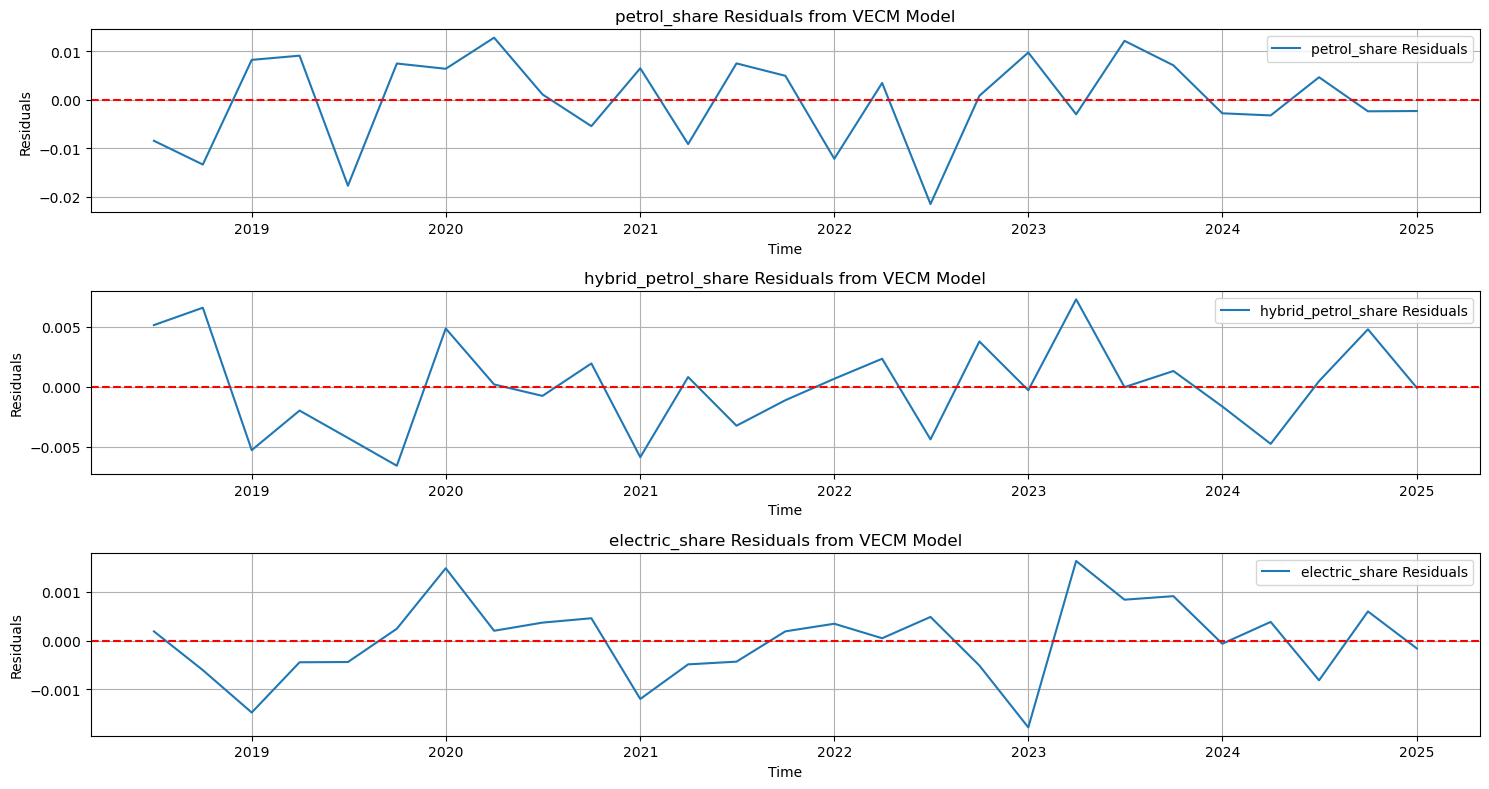

In [58]:
# Visualize the residuals of the fitted model
plt.figure(figsize=(15, 8))
for i, var in enumerate(endog_vars):
    plt.subplot(len(endog_vars), 1, i + 1)
    plt.plot(df_residuals.index, df_residuals[var], label=f'{var} Residuals')
    plt.title(f'{var} Residuals from VECM Model')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Auto-correlation and Ljung-Box test for residuals
for var in endog_vars:
    lb_test = acorr_ljungbox(df_residuals[var], lags=[4, 8, 12], return_df=True)
    print(f"{var} Residuals Auto-correlation and Ljung-Box Test Results:")
    print(lb_test)

petrol_share Residuals Auto-correlation and Ljung-Box Test Results:
      lb_stat  lb_pvalue
4    4.405894   0.353852
8    7.155365   0.519967
12  11.288905   0.504335
hybrid_petrol_share Residuals Auto-correlation and Ljung-Box Test Results:
      lb_stat  lb_pvalue
4    4.538662   0.337988
8    8.525977   0.383846
12  11.600666   0.478260
electric_share Residuals Auto-correlation and Ljung-Box Test Results:
      lb_stat  lb_pvalue
4    4.900860   0.297622
8    8.826143   0.357174
12  10.598140   0.563635


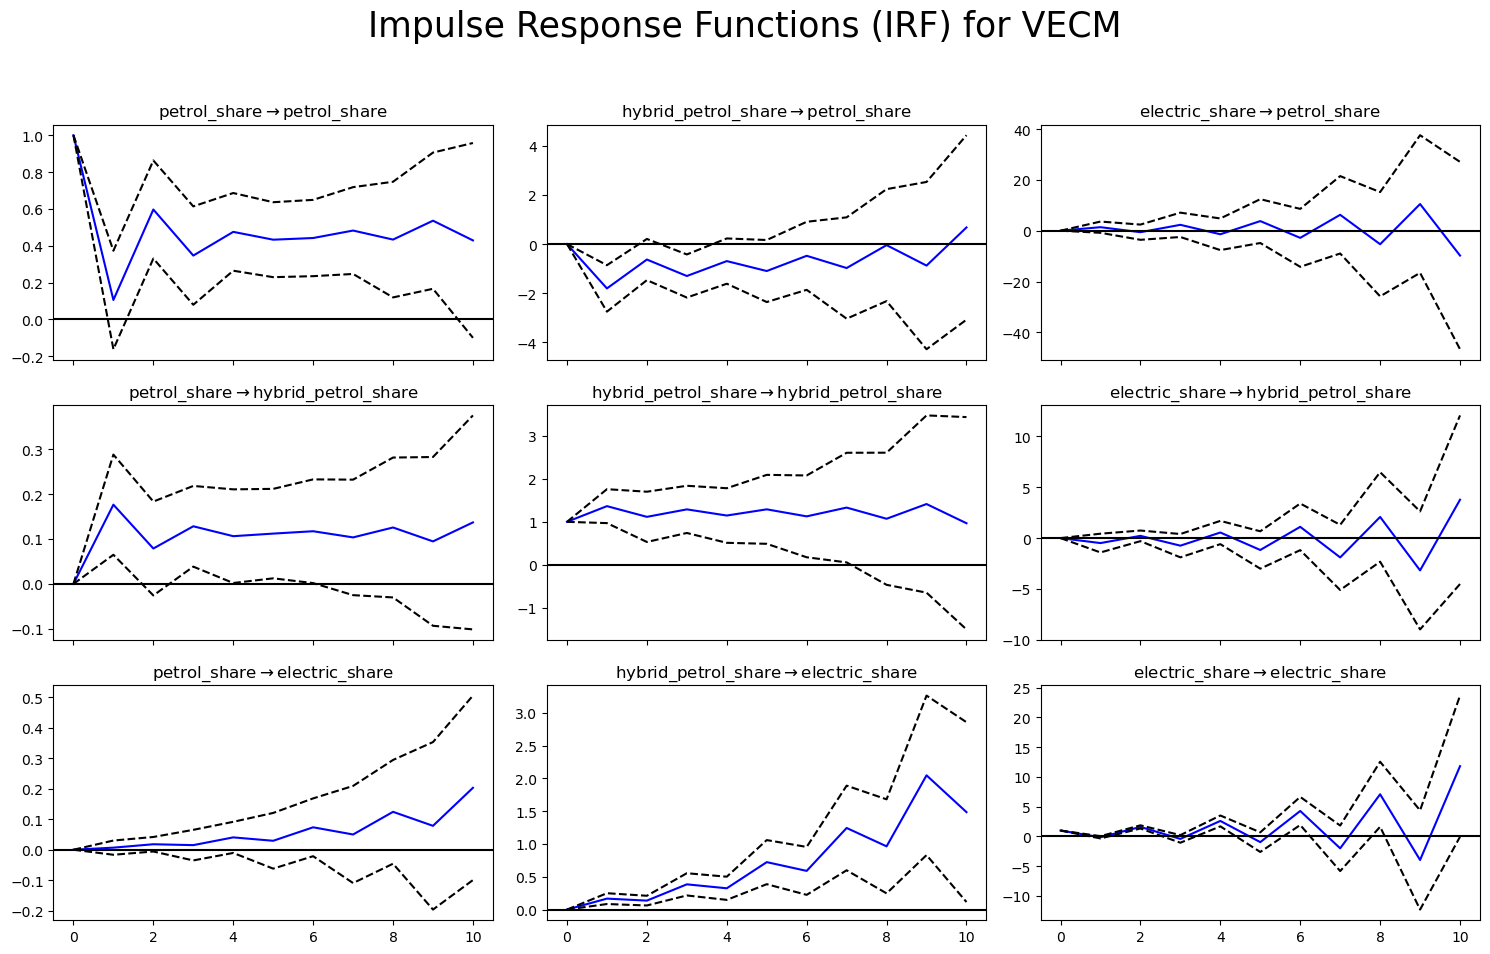

In [60]:
# Visualize the autocorrelation of residuals
irf = model_vecm_fitted.irf(periods=10)
irf.plot(orth=False, figsize=(15, 10))
plt.suptitle('Impulse Response Functions (IRF) for VECM', fontsize=25)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [61]:
# Extended forecast to 2025 Q4
forecast_dates = pd.date_range(start='2025-04-01', end='2025-10-01', freq='QS')
n_extended_steps = len(forecast_dates)

# Fill future exog with last quarter's exog value (conservative estimate)
last_exog = df_test[exog_vars].iloc[-1].values
future_exog = np.tile(last_exog, (n_extended_steps, 1))

# Create a full exogenous forecast array
full_exog_forecast = np.vstack([df_test[exog_vars].values, future_exog])
full_forecast_steps = len(full_exog_forecast)

# Perform predictions using fitted VECM model
forecast_output_extended = model_vecm_fitted.predict(
    steps=full_forecast_steps,
    exog_fc=full_exog_forecast
)

# Generate prediction DataFrame
extended_index = df_test.index.union(forecast_dates)
df_full_forecast = pd.DataFrame(forecast_output_extended, index=extended_index, columns=endog_vars)
df_full_forecast.to_csv('Data/data_model_VECM_full_forecast.csv', index=True)
df_full_forecast

,petrol_share,hybrid_petrol_share,electric_share
2024-04-01,0.872604,0.033938,0.040049
2024-07-01,0.895780,0.027691,0.033595
2024-10-01,0.875842,0.036640,0.063250
2025-01-01,0.917161,0.025161,0.049836
2025-04-01,0.879580,0.040900,0.099042
2025-07-01,0.950490,0.020590,0.072438
2025-10-01,0.882250,0.048013,0.154501


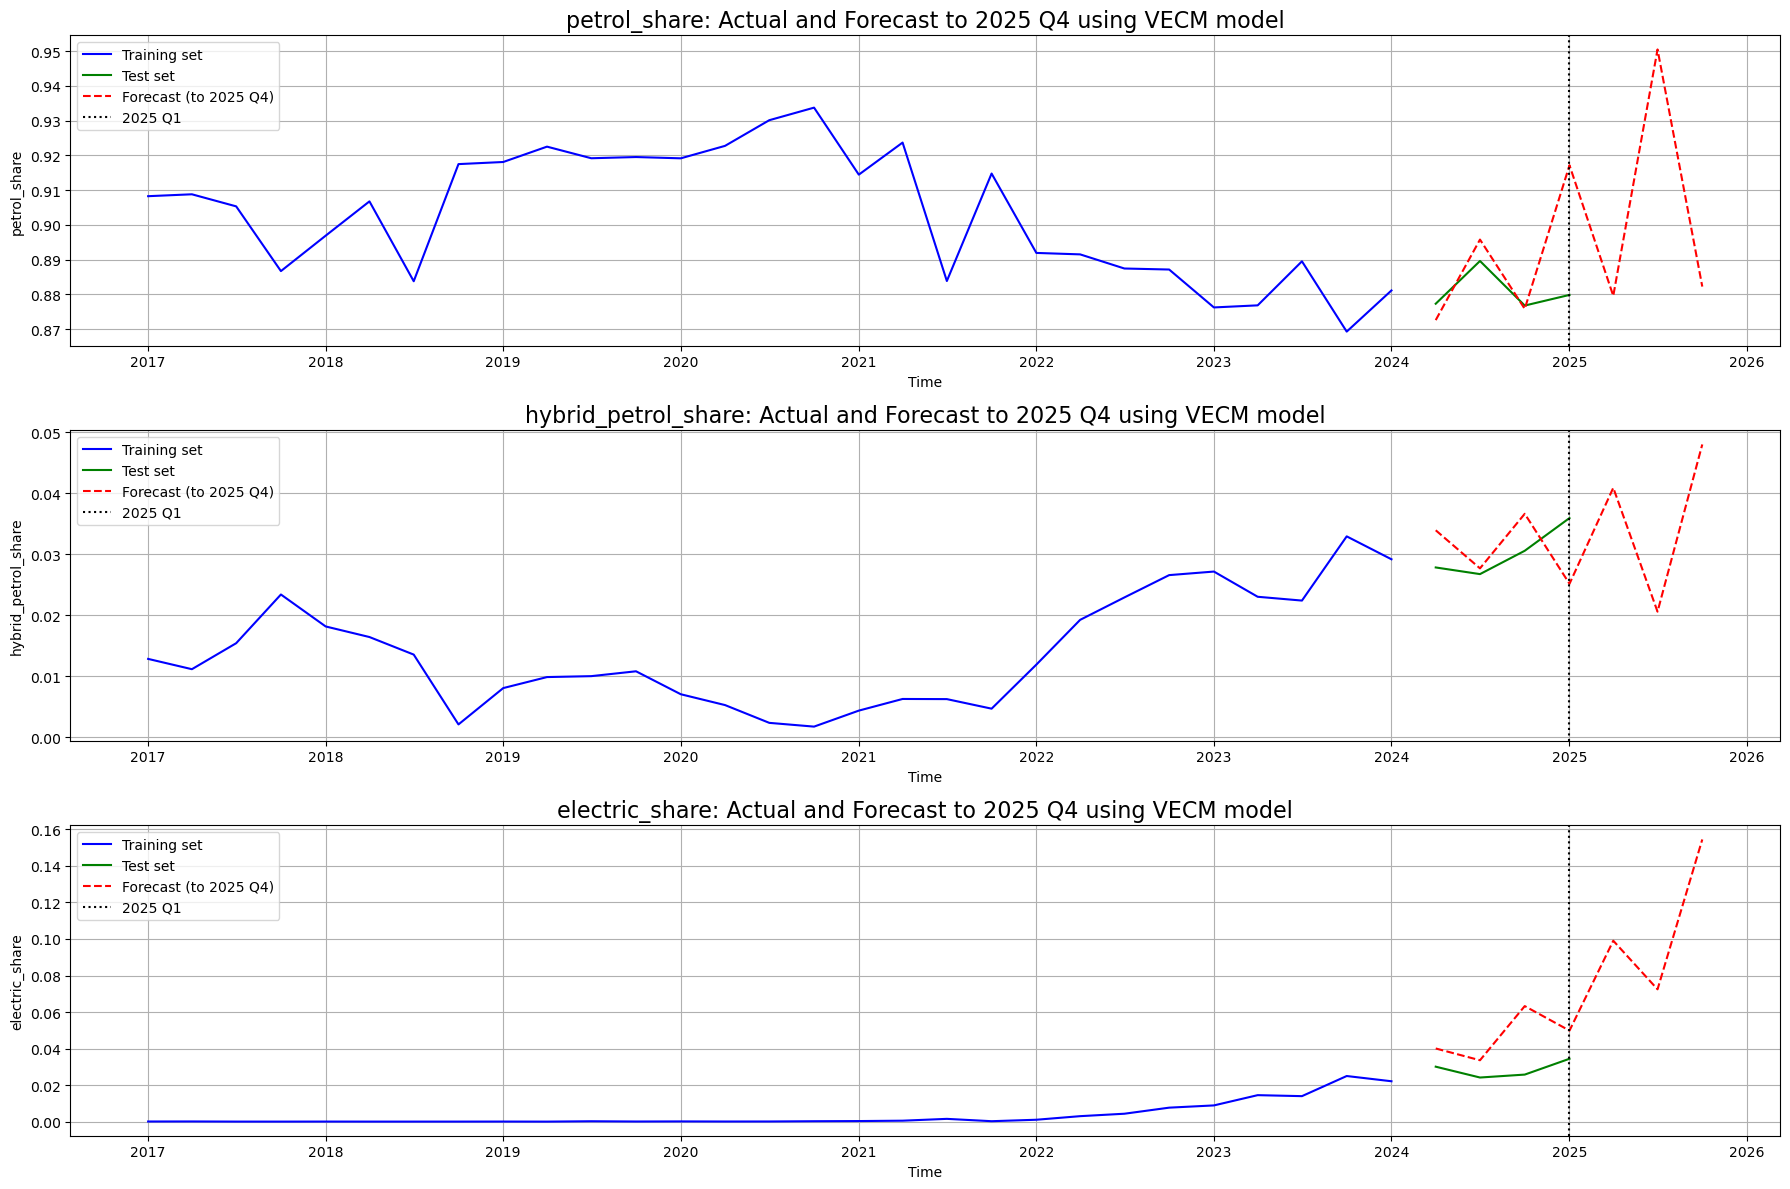

In [62]:
# Visualize the extended forecast
plt.figure(figsize=(18, 12))
for i, var in enumerate(endog_vars):
    plt.subplot(len(endog_vars), 1, i + 1)
    plt.plot(df_train.index, df_train[var], label='Training set', color='blue')
    plt.plot(df_test.index, df_test[var], label='Test set', color='green')
    plt.plot(df_full_forecast.index, df_full_forecast[var], label='Forecast (to 2025 Q4)', color='red', linestyle='--')
    plt.axvline(x=pd.to_datetime('2025-01-01'), color='black', linestyle=':', label='2025 Q1')
    plt.title(f'{var}: Actual and Forecast to 2025 Q4 using VECM model', fontsize=16)
    plt.xlabel('Time')
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()